In [45]:
#                                                         Project-2
#                                     Finding Relation Between Salinity and Tempreture
#                                                   Dataset = bottle.csv

In [70]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('C:/Users/Satyam/Downloads/bottle.csv')

C:\Users\Satyam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
df1 = df.iloc[:,[49,50,51,52,53,54,55]] #using Reported data columns

In [73]:
# df.dropna(axis=1, how='all')

In [74]:
df1.head(4)

,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT
0,0,10.50,10.50,33.440,25.64,233.0,0.00
1,8,10.46,10.46,33.440,25.65,232.5,0.01
2,10,10.46,10.46,33.437,25.65,232.8,0.02
3,19,10.45,10.45,33.420,25.64,234.1,0.04


In [75]:
# df1 = df1.replace('?', np.nan)
df1 = df1.dropna()
df1.shape

(807121, 7)

# Using the Statsmodels to estimate the model coefficients for the data:

In [76]:
import statsmodels.formula.api as smf

# creating a fitted model in one line
lm = smf.ols(formula='R_SALINITY ~ R_Depth + R_POTEMP + R_TEMP + R_SIGMA + R_SVA + R_DYNHT', data=df1).fit()

# pringtin the coefficients
lm.params

Intercept    18.771906
R_Depth       0.000660
R_POTEMP      7.424436
R_TEMP       -7.142914
R_SIGMA       0.531414
R_SVA        -0.008491
R_DYNHT       0.414726
dtype: float64

In [77]:
lm.rsquared

0.9609685318572914

In [78]:
lm.pvalues

Intercept    0.0
R_Depth      0.0
R_POTEMP     0.0
R_TEMP       0.0
R_SIGMA      0.0
R_SVA        0.0
R_DYNHT      0.0
dtype: float64

In [79]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             R_SALINITY   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 3.312e+06
Date:                Sat, 14 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:28:05   Log-Likelihood:             7.8880e+05
No. Observations:              807121   AIC:                        -1.578e+06
Df Residuals:                  807114   BIC:                        -1.578e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.7719      0.054    347.703      0.000      18.666      18.878
R_Depth        0.0007   1.89e-06    350.047      0.000       0.001       0.001
R_POTEMP       7.4244      0.026    289.947      0.000       7.374       7.475
R_TEMP        -7.1429      0.026   -279.159      0.000      -7.193      -7.093
R_SIGMA        0.5314      0.002    276.365      0.000       0.528       0.535
R_SVA         -0.0085   1.98e-05   -428.876      0.000      -0.009      -0.008
R_DYNHT        0.4147      0.001    430.732      0.000       0.413       0.417
==============================================================================
Omnibus:                   592785.148   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39678651.648
Skew:                           2.933   Prob(JB):                         0.00
Kurtosis:                      36.844   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
lm1 = smf.ols(formula='R_SALINITY ~ R_TEMP', data=df1).fit()

# pringtin the coefficients
lm1.params

Intercept    34.437584
R_TEMP       -0.055033
dtype: float64

In [81]:
lm1.rsquared

0.2532637256834973

In [82]:
lm1.pvalues

Intercept    0.0
R_TEMP       0.0
dtype: float64

In [84]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             R_SALINITY   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                 2.737e+05
Date:                Sat, 14 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:29:30   Log-Likelihood:            -4.0224e+05
No. Observations:              807121   AIC:                         8.045e+05
Df Residuals:                  807119   BIC:                         8.045e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.4376      0.001   2.81e+04      0.000      34.435      34.440
R_TEMP        -0.0550      0.000   -523.205      0.000      -0.055      -0.055
==============================================================================
Omnibus:                   172139.426   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1050468.448
Skew:                           0.890   Prob(JB):                         0.00
Kurtosis:                       8.298   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

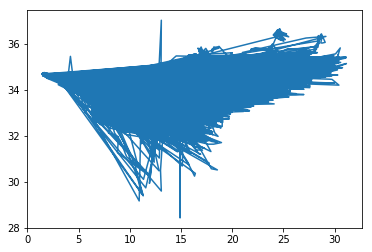

In [87]:
import matplotlib.pyplot as plt

X = df1[['R_TEMP']]
y = df1[['R_SALINITY']]
plt.plot(X,y)
plt.show()

# Using scikit-Learn Linear Regression Model

In [60]:
import sklearn
from sklearn.linear_model import LinearRegression

In [61]:
X = df1.drop('R_SALINITY', axis=1)
y = df1[['R_SALINITY']]

from sklearn.model_selection import train_test_split

# Split X and y into X_train, X_test, y_train, y_test using train_test_split method

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [62]:
# printing the shapes of X_train, X_test, y_train, y_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(605340, 6)
(201781, 6)
(605340, 1)
(201781, 1)


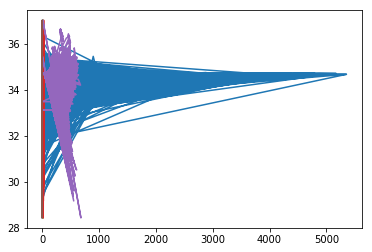

In [63]:
# plotting X and y

import matplotlib.pyplot as plt

plt.plot(X,y)
plt.show()

In [64]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for R_Depth is 0.0006534107770354428
The coefficient for R_TEMP is -7.0440188363658836
The coefficient for R_POTEMP is 7.325502363426342
The coefficient for R_SIGMA is 0.5239442748261979
The coefficient for R_SVA is -0.008567790999215412
The coefficient for R_DYNHT is 0.4144851033753381


In [66]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 18.981667654356336



Printing the Score:-


In [67]:
regression_model.score(X_test, y_test)

0.9612174751788092

In [68]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

0.008236304380088549

In [69]:
import math

math.sqrt(regression_model_mse)

0.09075408740155205